In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
merged_save_path = Path('data') / 'merged'

In [3]:
player_data = pd.read_csv(merged_save_path / 'player_data.csv')
player_data.head()

,player,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,mvp_share,mvp_rank,first_place_votes
0,Vince Carter,23,82,82,38.1,9.6,20.7,0.465,1.2,2.9,...,2.7,11.8,0.182,5.6,-0.1,5.5,5.9,0.042,10,0.0
1,Vince Carter,24,75,75,39.7,10.2,22.1,0.460,2.2,5.3,...,2.6,12.9,0.208,7.6,0.1,7.6,7.2,0.006,11T,0.0
2,Michael Finley,27,82,82,42.0,8.7,18.9,0.458,1.1,3.2,...,2.9,8.5,0.119,2.4,-0.5,1.9,3.4,0.001,15T,0.0
3,Dirk Nowitzki,23,76,76,38.0,7.9,16.6,0.477,1.8,4.6,...,3.1,13.4,0.222,5.4,0.1,5.5,5.5,0.025,8,0.0
4,Jerry Stackhouse,27,76,76,35.3,6.9,17.4,0.397,1.1,3.9,...,2.6,5.8,0.104,2.6,-1.2,1.4,2.4,0.002,15,0.0


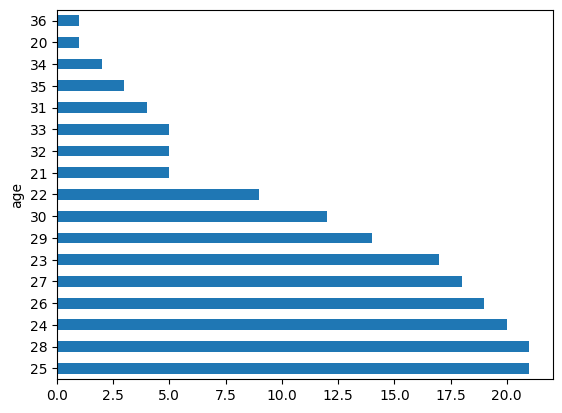

In [4]:
player_data['age'].value_counts().plot.barh()
plt.show()

## Modeling

In [5]:
from model import *

years_test = [2022]
metrics_df = pd.DataFrame()
player_data.head()

,player,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,mvp_share,mvp_rank,first_place_votes
0,Vince Carter,23,82,82,38.1,9.6,20.7,0.465,1.2,2.9,...,2.7,11.8,0.182,5.6,-0.1,5.5,5.9,0.042,10,0.0
1,Vince Carter,24,75,75,39.7,10.2,22.1,0.460,2.2,5.3,...,2.6,12.9,0.208,7.6,0.1,7.6,7.2,0.006,11T,0.0
2,Michael Finley,27,82,82,42.0,8.7,18.9,0.458,1.1,3.2,...,2.9,8.5,0.119,2.4,-0.5,1.9,3.4,0.001,15T,0.0
3,Dirk Nowitzki,23,76,76,38.0,7.9,16.6,0.477,1.8,4.6,...,3.1,13.4,0.222,5.4,0.1,5.5,5.5,0.025,8,0.0
4,Jerry Stackhouse,27,76,76,35.3,6.9,17.4,0.397,1.1,3.9,...,2.6,5.8,0.104,2.6,-1.2,1.4,2.4,0.002,15,0.0


### Support Vector Regression

{'C': 0.5, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


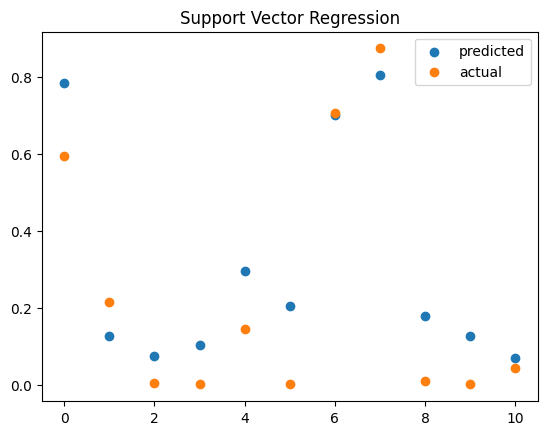

                  Player  MVP Share (Actual)  MVP Share (SVR)
0           Nikola Jokić               0.875         0.806016
0            Joel Embiid               0.706         0.700782
0  Giannis Antetokounmpo               0.595         0.784571


In [6]:
metrics_df = svm_model(player_data, metrics_df, years_test)

### Random Forest

/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


{'bootstrap': True, 'max_features': 5, 'n_estimators': 64, 'oob_score': True}


/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/darrenhoang/anaconda3/envs/nb

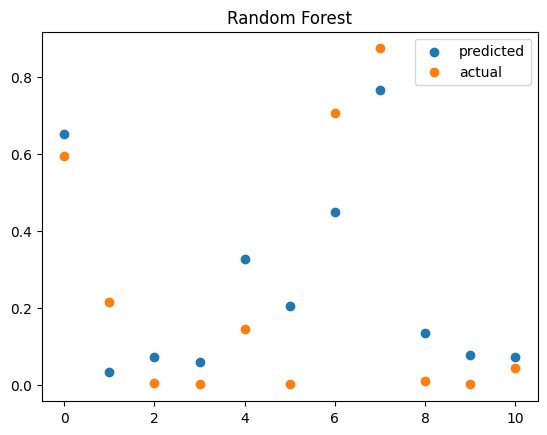

                  Player  MVP Share (Actual)  MVP Share (Random Forest)
0           Nikola Jokić               0.875                   0.766578
0            Joel Embiid               0.706                   0.448734
0  Giannis Antetokounmpo               0.595                   0.652062


In [7]:
metrics_df = random_forest_model(player_data, metrics_df, years_test)

### ElasticNet

/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.401e-03, tolerance: 1.349e-03
  model = cd_fast.enet_coordinate_descent(
/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.781e-03, tolerance: 1.158e-03
  model = cd_fast.enet_coordinate_descent(
/Users/darrenhoang/anaconda3/envs/nba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

{'alpha': 0.1, 'l1_ratio': 0.01}


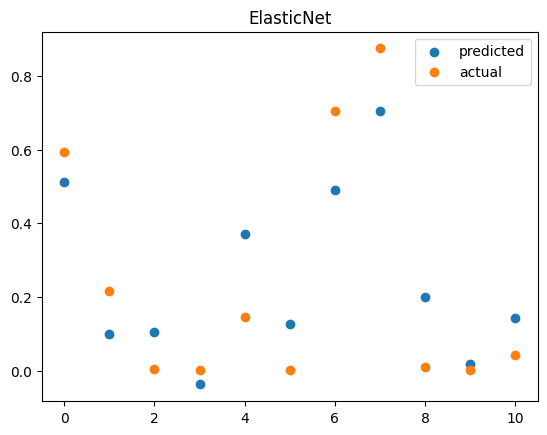

                  Player  MVP Share (Actual)  MVP Share (ElasticNet)
0           Nikola Jokić               0.875                0.704840
0            Joel Embiid               0.706                0.491596
0  Giannis Antetokounmpo               0.595                0.512930


In [8]:
metrics_df = elastic_net_model(player_data, metrics_df, years_test)

### AdaBoost

{'learning_rate': 0.05, 'n_estimators': 20}


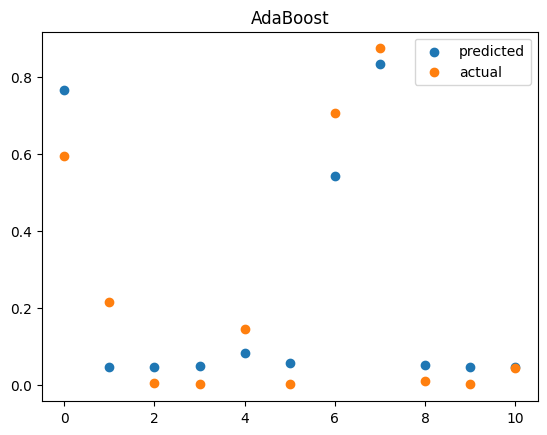

                  Player  MVP Share (Actual)  MVP Share (AdaBoost)
0           Nikola Jokić               0.875              0.835280
0            Joel Embiid               0.706              0.543156
0  Giannis Antetokounmpo               0.595              0.768000


In [9]:
metrics_df = adaboost_model(player_data, metrics_df, years_test)

### Gradient Boost

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}


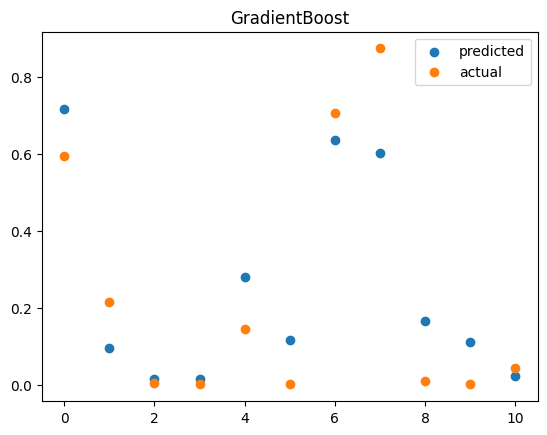

                  Player  MVP Share (Actual)  MVP Share (GradientBoost)
0           Nikola Jokić               0.875                   0.604075
0            Joel Embiid               0.706                   0.637739
0  Giannis Antetokounmpo               0.595                   0.718241


In [10]:
metrics_df = gradientboost_model(player_data, metrics_df, years_test)

### Final Results

In [11]:
metrics_df

,Model,Year,RMSE,R2
0,SVR,2022,0.125755,0.838022
0,Random Forest,2022,0.141400,0.795213
0,ElasticNet,2022,0.141311,0.795468
0,AdaBoost,2022,0.096289,0.905035
0,GradientBoost,2022,0.126648,0.835713
